In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [30]:
d=pd.read_excel("plz.xlsx")
d.dl=d.dl-d.dl[0]#/50
d

,t,dl
0,0,0.0000
1,30,0.1150
2,60,0.1450
3,120,0.1850
4,180,0.2050
5,300,0.2350
6,600,0.2650
7,900,0.3003
8,1200,0.3215


In [31]:
def ex(x, a, b, c, d, e):
    return a+b*np.exp(c*x)+d*np.exp(e*x)

def lg(x,a,b,c,d):
    return a+b*np.log(c*x+d)

constraint = {'type': 'ineq', 'fun': lambda params: np.min(params[2]*d.t + params[3])}

In [32]:
poptl, pcovl = curve_fit(lg, d.t, d.dl,  method="lm")
poptl, pcovl

C:\Users\Daniil\anaconda3\envs\bootcamp\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([-0.11881633,  0.05766664,  1.52632464,  7.90773538]),
 array([[ 2.60034153e+09,  3.51702863e+01, -6.88260278e+10,
         -3.56580754e+11],
        [ 3.51702863e+01,  4.71842027e-06, -9.30890371e+02,
         -4.82284719e+03],
        [-6.88260278e+10, -9.30890371e+02,  1.82169228e+12,
          9.43800520e+12],
        [-3.56580754e+11, -4.82284719e+03,  9.43800520e+12,
          4.88973593e+13]]))

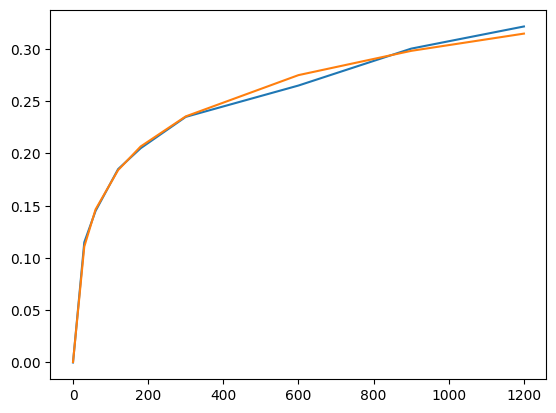

In [33]:
plt.plot(d.t, d.dl)
plt.plot(d.t, lg(d.t,*poptl))

In [34]:
popte, pcove = curve_fit(ex, d.t, d.dl,  method="lm", p0=[0]*5,maxfev=2000)
popte, pcove

(array([ 0.35468052, -0.19589674, -0.00143174, -0.15758112, -0.03308706]),
 array([[ 1.02086448e-03, -6.74267536e-04,  1.72468030e-05,
         -3.38505242e-04,  1.07732813e-04],
        [-6.74267536e-04,  5.30201159e-04, -1.04658558e-05,
          1.42790150e-04, -3.51561773e-05],
        [ 1.72468030e-05, -1.04658558e-05,  3.07705179e-07,
         -6.60986918e-06,  2.16882501e-06],
        [-3.38505242e-04,  1.42790150e-04, -6.60986918e-06,
          2.45412246e-04, -6.03257693e-05],
        [ 1.07732813e-04, -3.51561773e-05,  2.16882501e-06,
         -6.03257693e-05,  4.02542292e-05]]))

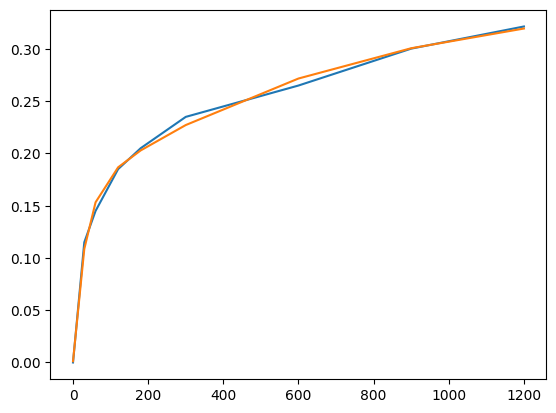

In [35]:
plt.plot(d.t, d.dl)
plt.plot(d.t, ex(d.t,*popte))

In [36]:
np.sqrt(np.diag(pcovl))

array([5.09935440e+04, 2.17219250e-03, 1.34970081e+06, 6.99266468e+06])

In [37]:
np.sqrt(np.diag(pcove))

array([0.03195097, 0.0230261 , 0.00055471, 0.01566564, 0.00634462])

In [38]:
sigm=5.67/0.975
sigm

5.815384615384615

In [39]:
poptl/=np.array([50*sigm,50*sigm,1,1])
popte/=np.array([50*sigm,50*sigm,1,50*sigm,1])

In [40]:
poptl,popte

(array([-4.08627585e-04,  1.98324418e-04,  1.52632464e+00,  7.90773538e+00]),
 array([ 0.0012198 , -0.00067372, -0.00143174, -0.00054195, -0.03308706]))

In [12]:
d.dl/=50

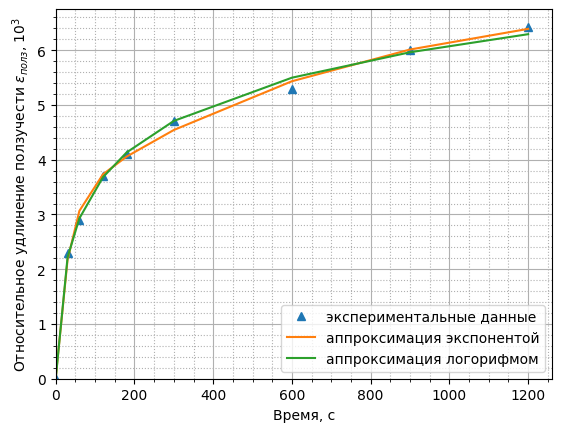

In [13]:
plt.plot(d.t, 1000*d.dl, '^',label="экспериментальные данные")
plt.plot(d.t, 1000*ex(d.t,*popte), label="аппроксимация экспонентой")
plt.plot(d.t, 1000*lg(d.t,*poptl), label="аппроксимация логорифмом")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.ylabel(r"Относительное удлинение ползучести $\varepsilon_{полз}$, $10^3$")
plt.xlabel("Время, с")
plt.legend()
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.savefig("pols.png")